# Types of Multi-Collinearity
1. Correlation
2. VIF
3. Condition No.

## Correlation

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<Axes: >

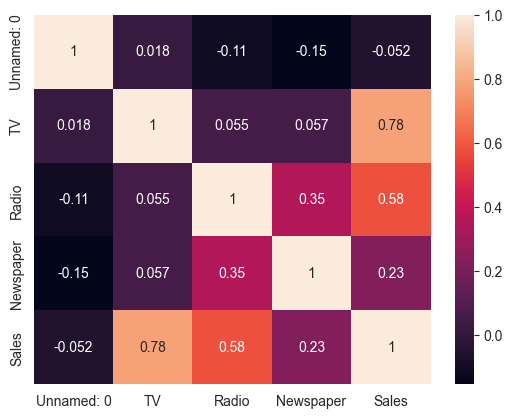

In [43]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
## We can notice here no value is getting over 0.8 or 0.9, hence there is no multi-collinearity in this data.

## Variance Inflation Factor (VIF)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:, 1:4], i))

pd.DataFrame({'vif': vif}, index=df.columns[1:4]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


In [ ]:
## As you can notice the VIF value is not exceeding 5 or 10, hence it proves no multi-collinearity

In [50]:
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multi-collinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100) # Introduce multi-collinearity between columns 0 and 1
 
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094
...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646
96,1.586017,1.734077,-1.237815,183.634164
97,0.010233,0.140761,-0.981509,17.531189
98,-0.234587,-0.232030,-1.415371,-63.202789


<Axes: >

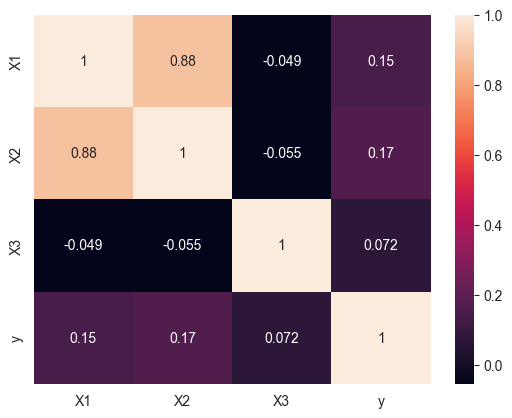

In [51]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
## As you can see, we have X1 and X2 with 0.88 value, indicating it is highly correlated to each other and hence this dataset has multi-collinearity

## Condition Number

In [29]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1. ,  1.2],
       [ 2. ,  2.1],
       [ 3. ,  3.1],
       [ 4. ,  4.1],
       [ 5. ,  5. ],
       [ 6. ,  6. ],
       [ 7. ,  7. ],
       [ 8. ,  8. ],
       [ 9. ,  9.1],
       [10. , 10.2]])

In [30]:
# When we calculate the conditional number for np.dot(X.T, X) we are getting a value higher than 30, indicating multi-collinearity
np.linalg.cond(np.dot(arr.T, arr))

20046.699764689125

In [31]:
# The values of the coefficients are also high
np.linalg.inv(np.dot(arr.T, arr))

array([[ 13.01721854, -12.8807947 ],
       [-12.8807947 ,  12.74834437]])

In [32]:
# Making small change in the input
# 1 -> 1.1

arr = np.array([[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1.1,  1.2],
       [ 2. ,  2.1],
       [ 3. ,  3.1],
       [ 4. ,  4.1],
       [ 5. ,  5. ],
       [ 6. ,  6. ],
       [ 7. ,  7. ],
       [ 8. ,  8. ],
       [ 9. ,  9.1],
       [10. , 10.2]])

In [33]:
arr.shape

(10, 2)

In [34]:
# Again the values have changed
np.linalg.inv(np.dot(arr.T, arr))

array([[ 20.2839924 , -20.07760258],
       [-20.07760258,  19.87585652]])

In [35]:
# We again got big value
np.linalg.cond(np.dot(arr.T, arr))

31255.615180043427

In [36]:
# Not let's take a dataset which is not multi-collinear
# Generate random data for each column independently
col2 = np.random.normal(50, 15, 10)  # Normal distribution (mean=50, std=15)
col3 = np.random.exponential(10, 10)  # Exponential distribution

# Combine and transpose for a similar structure
arr = np.column_stack([col2, col3])
print(arr)

[[14.34879879  0.98590838]
 [79.82745756  4.81634844]
 [40.54244875 11.94694106]
 [50.43051688 11.17060011]
 [46.89072711  0.42737859]
 [51.04329172  7.83255862]
 [64.70193777 16.09381391]
 [40.55272583 18.30466652]
 [46.31029445 27.79416056]
 [28.7201486  16.3665308 ]]


In [37]:
arr.shape

(10, 2)

In [38]:
# As you can notice the values of the coeff are much smaller now
np.linalg.inv(np.dot(arr.T, arr))

array([[ 0.00010351, -0.00028156],
       [-0.00028156,  0.00126903]])

In [39]:
# The condition number is greater than 30 because it is not scaled properly
cond_number = np.linalg.cond(np.dot(arr.T, arr))
print(f"Condition Number: {cond_number}")

Condition Number: 34.147065451894996


In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
arr_scaled = scaler.fit_transform(arr)

cond_number = np.linalg.cond(np.dot(arr_scaled.T, arr_scaled))
print(f"Condition Number after scaling: {cond_number}")

Condition Number after scaling: 1.066325711812466


# Ways to remove multi-collinearity
1. Get more data
2. Remove one of the highly correlated variable
3. Combine correlated variables
4. Use Partial Least Squares Regression (PLS) 

### 2. Remove one of the highly correlated variable

In [52]:
# Add a constant term to the predictor variables
import statsmodels.api as sm


data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_removed = sm.add_constant(data[['X1', 'X3']])

# Create and git an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

In [54]:
print('Regression summary for the model with all predictors:')
print(model_all.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.344
Time:                        18:04:49   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [56]:
model_reduced = sm.OLS(data['y'], data_with_constant_removed).fit()

print('Regression summary for the model with one predictor removed:')
print(model_reduced.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.405
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.250
Time:                        18:06:55   Log-Likelihood:                -582.25
No. Observations:                 100   AIC:                             1171.
Df Residuals:                      97   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [ ]:
# You can notice how the condition No. has reduced after removing the correlated column

### 3. Combine correlated variables

In [57]:
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100) # Introducing multi-coll between col 0 and 1

data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y
data

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094
...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646
96,1.586017,1.734077,-1.237815,183.634164
97,0.010233,0.140761,-0.981509,17.531189
98,-0.234587,-0.232030,-1.415371,-63.202789


<Axes: >

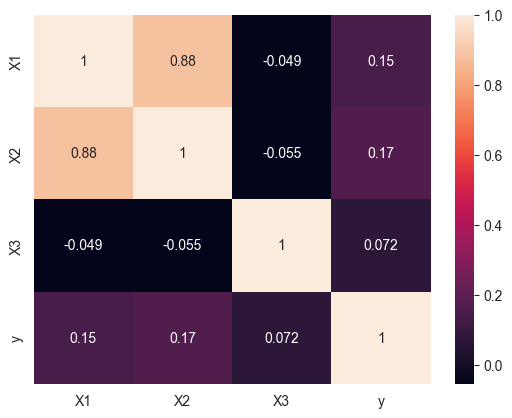

In [58]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
# We can notice X1 and X2 have correlation between them

In [62]:
data['X1_X2_combined'] = (data['X1'] + data['X2']) / 2

data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_combined = sm.add_constant(data[['X1_X2_combined', 'X3']])

model_all = sm.OLS(data['y'], data_with_constant_all).fit()

In [63]:
print('Regression Summary for the model with all predictors')
print(model_all.summary())

Regression Summary for the model with all predictors
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.344
Time:                        18:14:25   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [65]:
model_combined = sm.OLS(data['y'], data_with_constant_combined).fit()

print('Regressing summary for the model with combined predictors (X1_X2_combined and X3)')
print(model_combined.summary())

Regressing summary for the model with combined predictors (X1_X2_combined and X3)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.643
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.199
Time:                        18:15:58   Log-Likelihood:                -582.02
No. Observations:                 100   AIC:                             1170.
Df Residuals:                      97   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

### 4. Use Partial Least Squares Regression (PLS) 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100) # Introducing multi-coll between cols 0 and 1

data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y
data

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094
...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646
96,1.586017,1.734077,-1.237815,183.634164
97,0.010233,0.140761,-0.981509,17.531189
98,-0.234587,-0.232030,-1.415371,-63.202789


In [69]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3']], data['y'], random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(80, 3)
(20, 3)


In [70]:
pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)

PLSRegression()

In [71]:
y_pred = pls_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error of PLS Model: ', mse)

Mean Squared Error of PLS Model:  7359.987203343638


In [ ]:
# As you can see it is fairly high